In [1]:
import pickle

import matplotlib.pyplot as plt
import tensorflow as tf

import utils

2024-01-21 17:03:21.866157: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 17:03:21.866211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 17:03:21.866792: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 17:03:21.870501: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 17:03:22.627069: W tensorflow/compiler/tf2

Using TensorFlow backend


2024-01-21 17:03:23.818879: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-21 17:03:23.843271: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-21 17:03:23.843638: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-21 17:03:23.845638: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-21 17:03:23.846004: I external/local_xla/xla/stream_executor

In [2]:
with open("output/mit_b0_0/model.pkl", "rb") as f:
    model = pickle.load(f)

/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/models/task.py:43: UserWa

In [9]:
model.predict(image)

('paper',
 0.80764204,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.08373427, 0.80764204, 0.1086237 ]], dtype=float32)>)

In [4]:
image = utils.load_image("data/3/paper_3.jpeg", backbone="mit_b0")

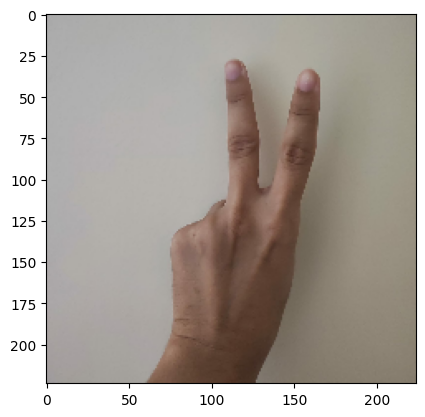

In [9]:
image = utils.load_image("data/3/scissors_3.jpeg", backbone="mit_b0")
plt.imshow(tf.cast(image[0], tf.uint8))

In [11]:
image_adv, pertubations = model.generate_adv_image(image, labels=[1], epsilon=0.8, return_pertubations=True)

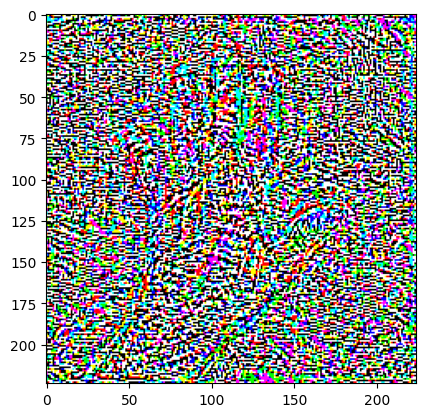

In [12]:
plt.imshow(0.5*pertubations[0]+0.5)

('scissors',
 0.45300496,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.27806544, 0.26892954, 0.45300496]], dtype=float32)>)

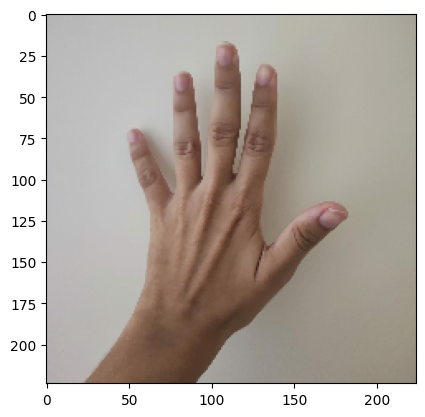

In [13]:
plt.imshow(tf.cast(image_adv[0], tf.uint8))
model.predict(image_adv)